# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from seglearn.pipe import Pype
from seglearn.transform import FeatureRep, SegmentX
from seglearn.base import TS_Data
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#%matplotlib notebook

# Paths

In [2]:
data_path = "./Data/HomoreDataFromVariousActivities/"
graphs_path = "./Graphs/"

# Importing the Data

In [3]:
activities_data = data_path + "activities.csv"
accelerometer_data = data_path + "accelerometer_various_activities_10hz.csv"
gyroscope_data = data_path + "gyroscope_various_activities_10hz.csv"
heartrate_data = data_path + "heartrate_various_activities.csv"

In [4]:
df_activities = pd.read_csv(activities_data)
df_accelerometer = pd.read_csv(accelerometer_data)
df_gyroscope = pd.read_csv(gyroscope_data)
df_heartrate = pd.read_csv(heartrate_data)

In [5]:
#df_activities.head()
df_accelerometer.head()
#df_gyroscope.head()
#df_heartrate.head()

,TIMESTAMP,X_AXIS,Y_AXIS,Z_AXIS,ACTIVITY_ID
0,2020-08-25 19:23:14.590000+03:00,-1.230657,5.430215,7.670058,107
1,2020-08-25 19:23:14.690000+03:00,-1.743032,4.716721,8.117788,107
2,2020-08-25 19:23:14.790000+03:00,-2.229070,4.455745,8.960572,107
3,2020-08-25 19:23:14.890000+03:00,-2.496031,3.766193,9.097046,107
4,2020-08-25 19:23:14.990000+03:00,-2.711515,2.225478,9.026415,107


In [6]:
df_activities.head()
#df_accelerometer.head()
#df_gyroscope.head()
#df_heartrate.head()

,ACTIVITY_ID,NAME
0,101,jogging
1,102,walking
2,103,standing
3,104,sitting
4,105,stairs


In [7]:
#df_activities.info()
#df_accelerometer.info()
#df_gyroscope.info()
df_heartrate.info()
print("There is no missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15240 entries, 0 to 15239
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIMESTAMP    15240 non-null  object
 1   HEARTRATE    15240 non-null  int64 
 2   ACTIVITY_ID  15240 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 357.3+ KB
There is no missing values


In [8]:
datetime_format = "%Y-%m-%d %H:%M:%S.%f"
df_accelerometer["TIMESTAMP"] = pd.to_datetime(df_accelerometer["TIMESTAMP"], format=datetime_format)
df_gyroscope["TIMESTAMP"] = pd.to_datetime(df_gyroscope["TIMESTAMP"], format=datetime_format)
df_heartrate["TIMESTAMP"] = pd.to_datetime(df_heartrate["TIMESTAMP"], format=datetime_format)
print(df_accelerometer["TIMESTAMP"])
print("")
print(df_gyroscope["TIMESTAMP"])
print("")
print(df_heartrate["TIMESTAMP"])
print("")
print("Accelerometer and gyroscope are synchronized.")

0        2020-08-25 19:23:14.590000+03:00
1        2020-08-25 19:23:14.690000+03:00
2        2020-08-25 19:23:14.790000+03:00
3        2020-08-25 19:23:14.890000+03:00
4        2020-08-25 19:23:14.990000+03:00
                       ...               
154195   2020-09-03 14:51:07.071000+03:00
154196   2020-09-03 14:51:07.171000+03:00
154197   2020-09-03 14:51:07.271000+03:00
154198   2020-09-03 14:51:07.371000+03:00
154199   2020-09-03 14:51:07.471000+03:00
Name: TIMESTAMP, Length: 154200, dtype: datetime64[ns, pytz.FixedOffset(180)]

0        2020-08-25 19:23:14.590000+03:00
1        2020-08-25 19:23:14.690000+03:00
2        2020-08-25 19:23:14.790000+03:00
3        2020-08-25 19:23:14.890000+03:00
4        2020-08-25 19:23:14.990000+03:00
                       ...               
154195   2020-09-03 14:51:07.071000+03:00
154196   2020-09-03 14:51:07.171000+03:00
154197   2020-09-03 14:51:07.271000+03:00
154198   2020-09-03 14:51:07.371000+03:00
154199   2020-09-03 14:51:07.471000+03:

# Ploting the Data

## Checking if data are synchronized.

/home/geo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.
/home/geo/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


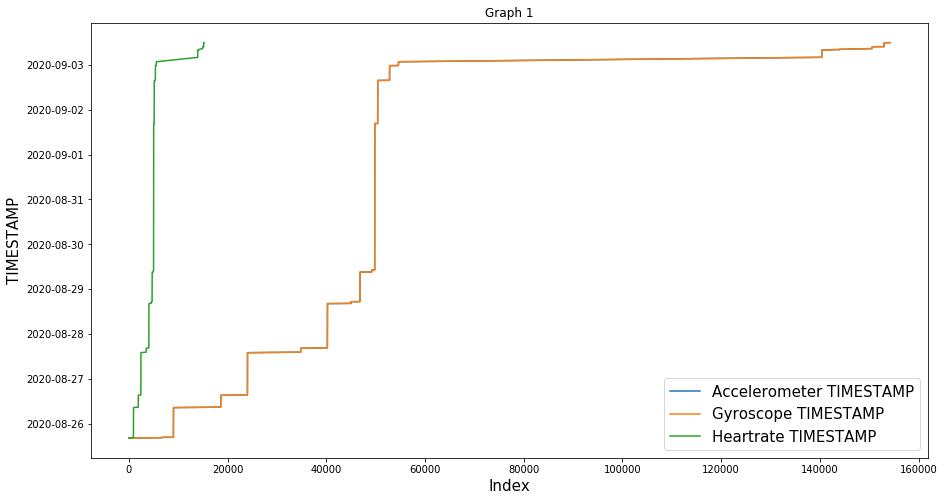

In [9]:
#df[["x_acceleration", "y_acceleration", "z_acceleration"]].plot(figsize=(20, 12))
title = "Graph 1"
df_accelerometer["TIMESTAMP"].plot(figsize = (15, 8))
df_gyroscope["TIMESTAMP"].plot()
df_heartrate["TIMESTAMP"].plot()
plt.title(title)
plt.legend(["Accelerometer TIMESTAMP", "Gyroscope TIMESTAMP", "Heartrate TIMESTAMP"], fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("TIMESTAMP", fontsize=15)
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

## Ploting frequency of every activity

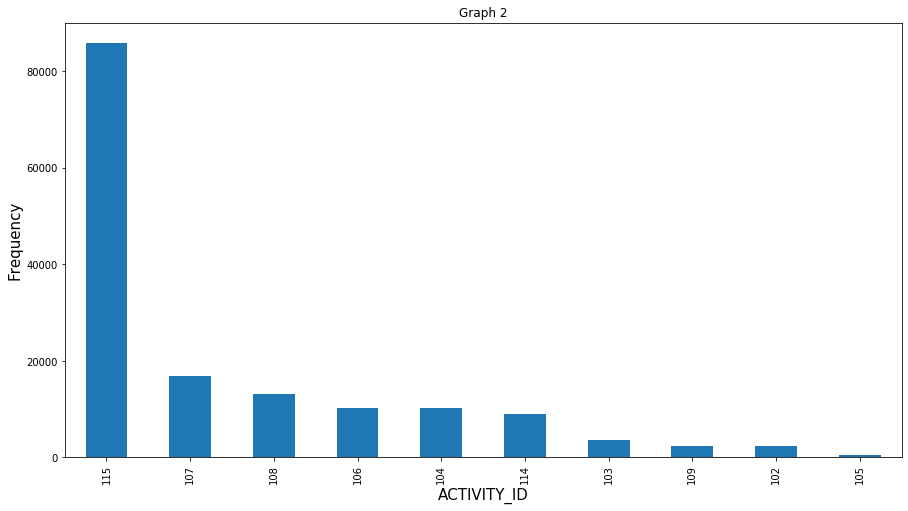

In [10]:
title = "Graph 2"
df_activities_counter = df_accelerometer["ACTIVITY_ID"].value_counts()
df_activities_counter.plot.bar(figsize = (15, 8))
plt.title(title)
plt.xlabel("ACTIVITY_ID", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

## Ploting data of the sensors

/home/geo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if sys.path[0] == '':


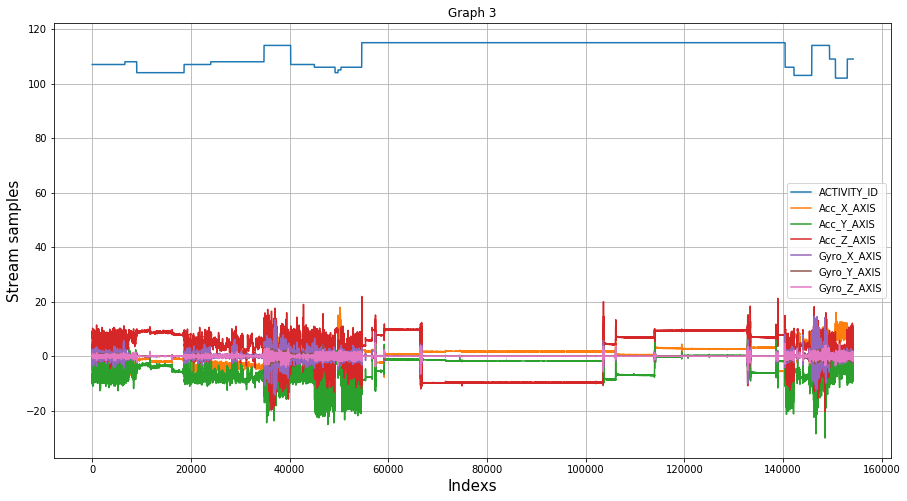

In [11]:
title = "Graph 3"
ax = df_accelerometer[["ACTIVITY_ID", "X_AXIS", "Y_AXIS", "Z_AXIS"]].plot(figsize = (15, 8))
ax.plot(df_gyroscope[["X_AXIS", "Y_AXIS", "Z_AXIS"]])
plt.title(title)
plt.xlabel("Indexs", fontsize=15)
plt.ylabel("Stream samples", fontsize=15)
plt.grid()
plt.legend(["ACTIVITY_ID", "Acc_X_AXIS", "Acc_Y_AXIS", "Acc_Z_AXIS", "Gyro_X_AXIS", "Gyro_Y_AXIS", "Gyro_Z_AXIS"])
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()

## Find when activity changes

In [12]:
sampling_frequency = df_accelerometer.loc[2, "TIMESTAMP"] - df_accelerometer.loc[1, "TIMESTAMP"]
print(sampling_frequency)
activity_cutoff = df_accelerometer.loc[df_accelerometer['TIMESTAMP'] - df_accelerometer['TIMESTAMP'].shift() > sampling_frequency]

0 days 00:00:00.100000


In [13]:
activity_cutoff.index

Int64Index([  6600,   9000,  18600,  24000,  34800,  40200,  45000,  46800,
             49200,  49800,  50400,  52800,  54600, 140400, 142200, 144000,
            145800, 149400, 150600, 153000],
           dtype='int64')

/home/geo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


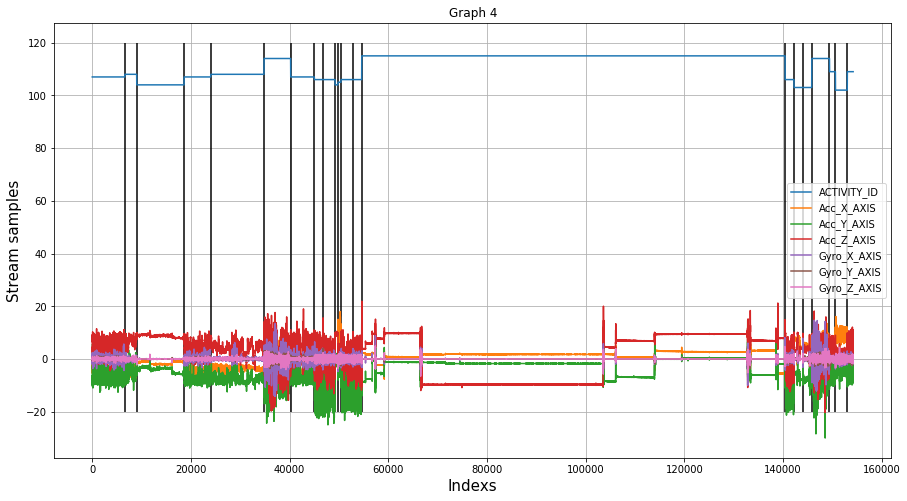

In [14]:
title = "Graph 4"
ax = df_accelerometer[["ACTIVITY_ID", "X_AXIS", "Y_AXIS", "Z_AXIS"]].plot(figsize = (15, 8))
ax.plot(df_gyroscope[["X_AXIS", "Y_AXIS", "Z_AXIS"]])
ax.vlines(activity_cutoff.index, ymin=-20, ymax=120)
plt.title(title)
plt.xlabel("Indexs", fontsize=15)
plt.ylabel("Stream samples", fontsize=15)
plt.grid()
plt.legend(["ACTIVITY_ID", "Acc_X_AXIS", "Acc_Y_AXIS", "Acc_Z_AXIS", "Gyro_X_AXIS", "Gyro_Y_AXIS", "Gyro_Z_AXIS"])
plt.savefig(graphs_path + title, facecolor = "#E0E0E0")
plt.show()